<a href="https://colab.research.google.com/github/ShivinM-17/PyTorch-practices/blob/main/Classification_binary_multi_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Neural Network Classification

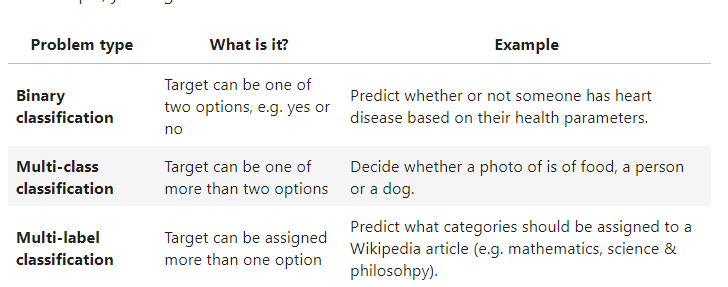

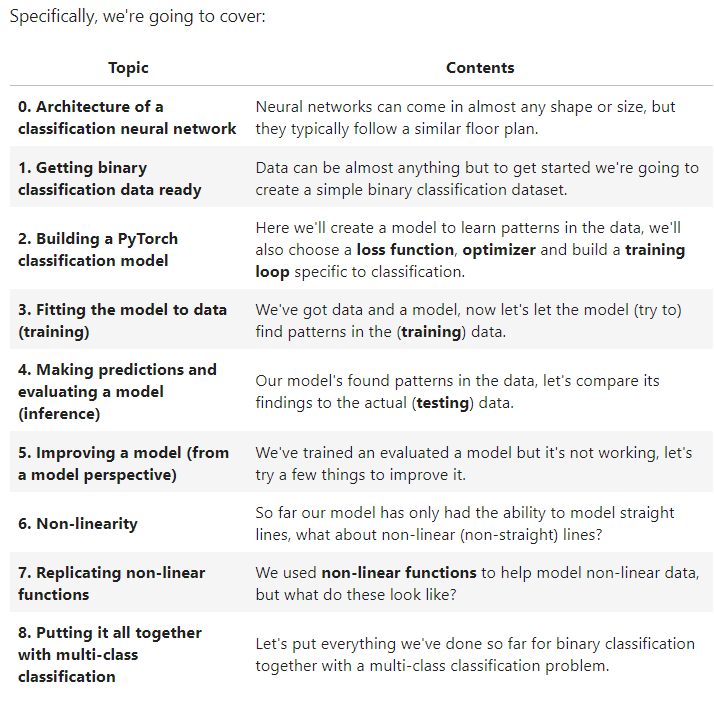

### Architecture of classification nn

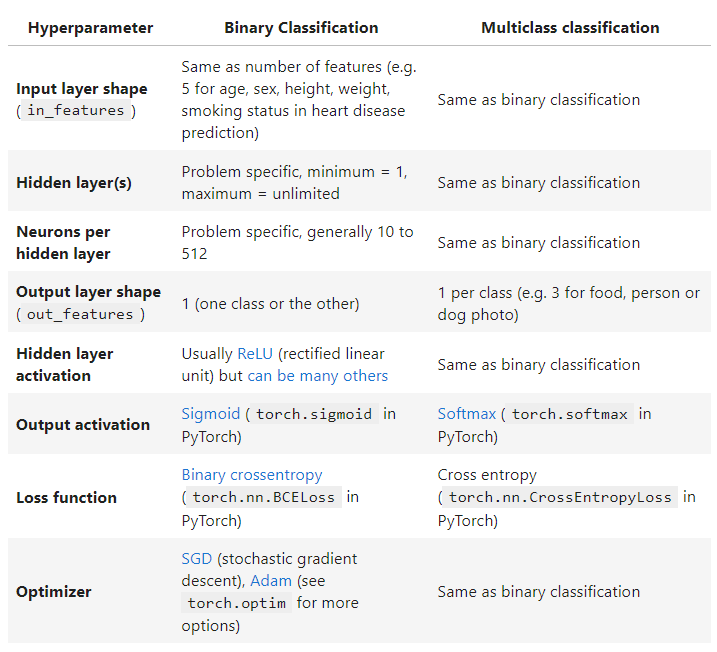

### Making the data

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In this data, we have two values of X for single value of y

In [3]:
# Making a dataframe out of it
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


This is a dataset for binary classification

In [4]:
# Checking the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Thus, we have a balanced dataset

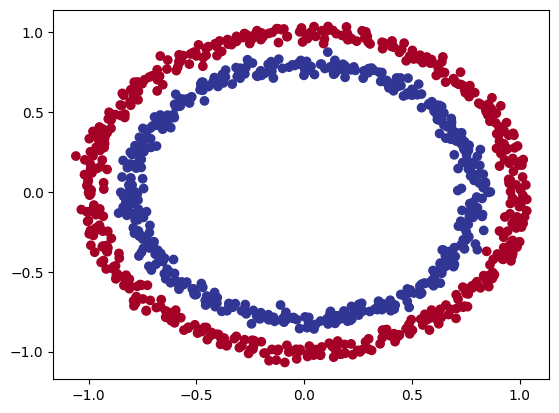

In [5]:
# Visualising the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

#### Input and output shapes

In [6]:
# Checking the shapes of the features and labels
X.shape, y.shape

((1000, 2), (1000,))

Thus, from this we can say that X has 2 features (vector), while y is scalar (1D) in nature

#### Turn the data into tensors and performing train-test-splits

In [8]:
# Turn the data into tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Viewing the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Performing train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [10]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

Now, we have 800 training samples and 200 testing samples

### Building the model

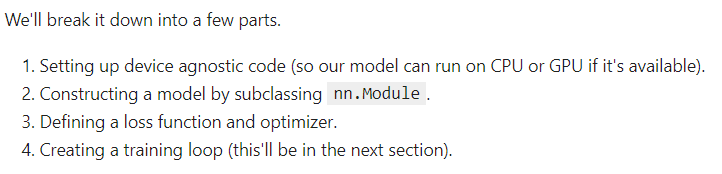

In [11]:
# Importing necessary modules
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

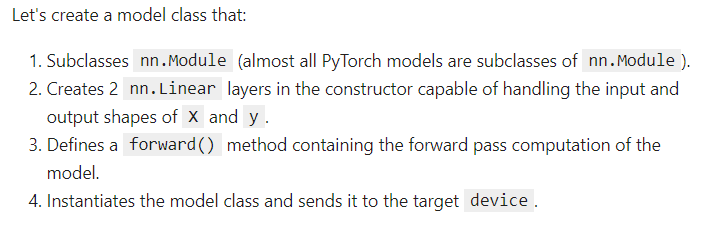

In [33]:
# Construct the model class
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # Creating 2 layers to handle X and y data inputs and outputs
    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layer_2=nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# Creating the model
model0=CircleModelV0().to(device)
model0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Here, the out_features from layer_1 i.e. 5 are the no. of neurons in the hidden layers.

Thus, the overall no. of neurons in each layers is:  2 -> 5 -> 1

In [34]:
# Replicating the above using sequential()
model0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
# Predictions without training the model
untrained_preds=model0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### Setting up the loss and optimizers

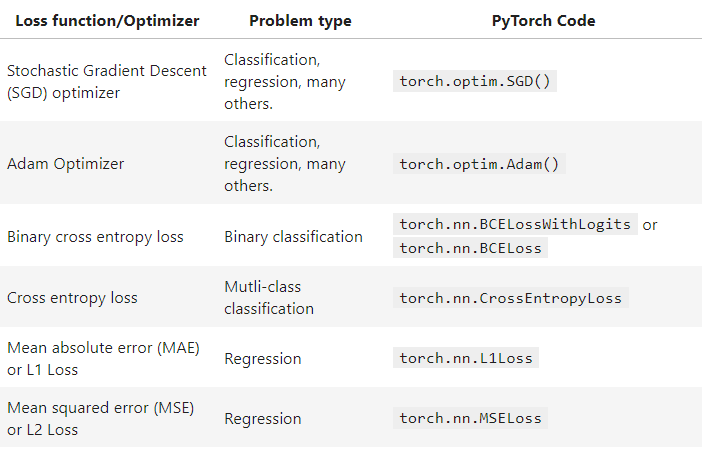

In [36]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [37]:
# Creating an evaluation metric function for the model (here, accuracy)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Training the model

#### Experimenting with raw model outputs to predicted labels

In [38]:
# Checking the predictions of the forward pass on test data
y_logits = model0(X_test.to(device))[:10]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

Here, we can see some random float numbers, these are the outputs of the forward pass

In [39]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736],
        [0.5737],
        [0.5351],
        [0.5542],
        [0.5201],
        [0.4929]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Now, we can say that the outputs are in the form of `Prediction Probabilities`

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

In [40]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))[:10]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0.], device='cuda:0',
       grad_fn=<SqueezeBackward0>)

In [41]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')

#### Building a training and testing loop

In [42]:
# Set up the seed
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Making the loss and acc values list
train_loss_values=[]
test_loss_values=[]
train_acc_values=[]
test_acc_values=[]
epoch_count=[]

# Put the data to target device
X_train, y_train  = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loops
for epoch in range(epochs):
  #### Training phase ####
  # Set the model in training mode
  model0.train()

  # Forward pass the model
  y_logits = model0(X_train).squeeze()  # since we require it in 1D
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # Calculate loss / accuracy
  loss = loss_fn(y_logits,   # Using nn.BCEWithLogitsLoss works with raw logits
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # Optimizer step
  optimizer.step()

  #### Testing phase ####
  # Put the model in evaluation phase
  model0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out the results of every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

  train_loss_values.append(loss.cpu().detach().numpy())
  test_loss_values.append(test_loss.cpu().detach().numpy())
  train_acc_values.append(acc)
  test_acc_values.append(test_acc)
  epoch_count.append(epoch)

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590, Accuracy: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490, Accuracy: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435, Accuracy: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401, Accuracy: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378, Accuracy: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362, Accuracy: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351, Accuracy: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342, Accuracy: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336, Accuracy: 49.88% | Test loss: 0.69262, Test acc: 53.00%
Epoch: 100 | Loss: 0.69331, Accuracy: 49.25% | Test loss: 0.69271, Test acc: 53.00%
Epoch: 110 | Loss: 0.69327, Accuracy: 49.75% | Test loss: 0.69279, Test acc: 54.00%
Epo

### Making the predictions and evaluating the model

In [43]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


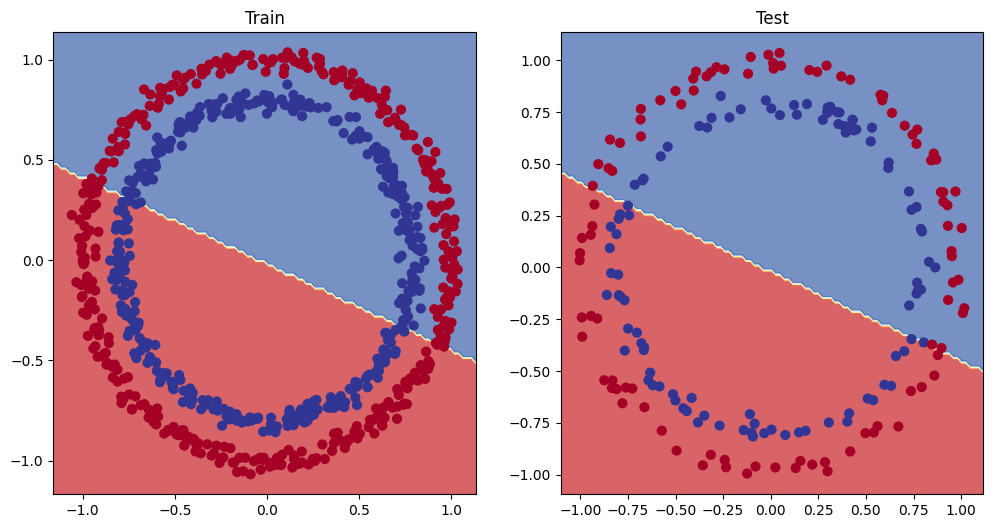

In [44]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)

From the above decision boundaries, we can say that the model is underfitting, which is true since we are getting about 50% accuracy, which is like the model is guessing what is the output

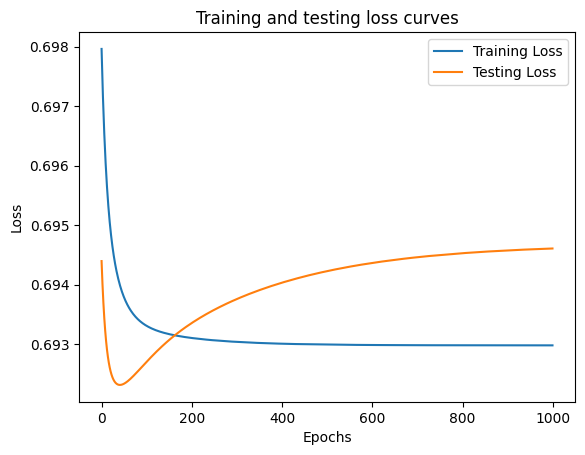

In [45]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

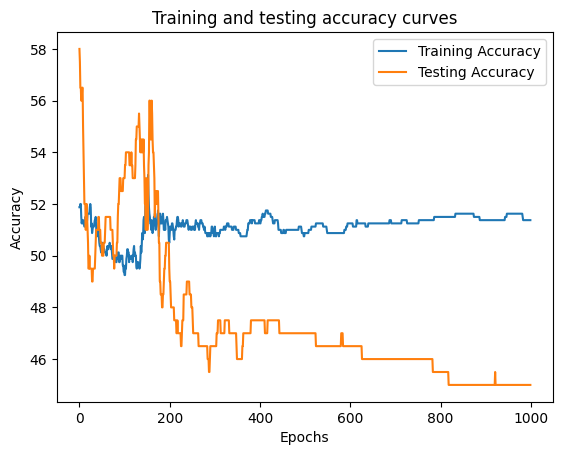

In [46]:
# Plotting the accuracy curves
plt.plot(epoch_count, train_acc_values, label="Training Accuracy")
plt.plot(epoch_count, test_acc_values, label="Testing Accuracy")
plt.title("Training and testing accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

### Improving the model

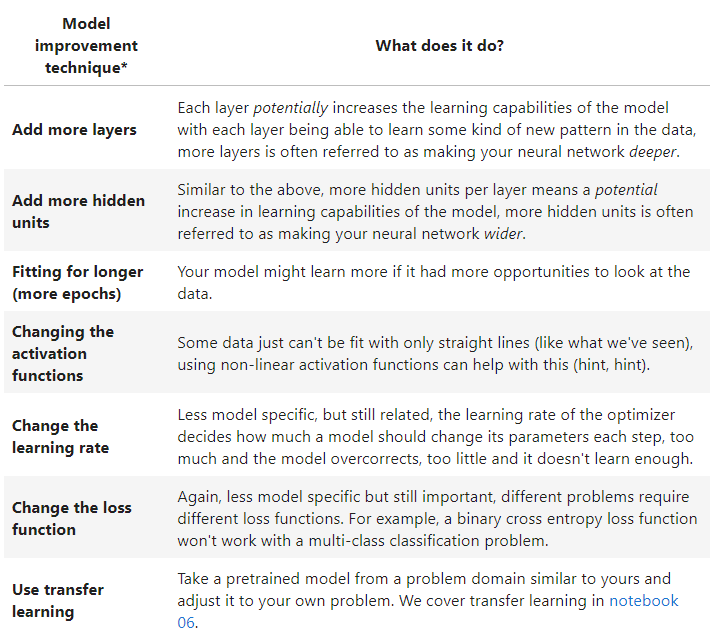

In [54]:
# Now, making a improved model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model1 = CircleModelV1().to(device)
model1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [55]:
# Making the loss and accuracy functions
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [57]:
# Set up the seed
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Making the loss and acc values list
train_loss_values=[]
test_loss_values=[]
train_acc_values=[]
test_acc_values=[]
epoch_count=[]

# Put the data to target device
X_train, y_train  = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loops
for epoch in range(epochs):
  #### Training phase ####
  # Set the model in training mode
  model0.train()

  # Forward pass the model
  y_logits = model1(X_train).squeeze()  # since we require it in 1D
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # Calculate loss / accuracy
  loss = loss_fn(y_logits,   # Using nn.BCEWithLogitsLoss works with raw logits
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # Optimizer step
  optimizer.step()

  #### Testing phase ####
  # Put the model in evaluation phase
  model0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out the results of every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

  train_loss_values.append(loss.cpu().detach().numpy())
  test_loss_values.append(test_loss.cpu().detach().numpy())
  train_acc_values.append(acc)
  test_acc_values.append(test_acc)
  epoch_count.append(epoch)

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69369, Accuracy: 50.25% | Test loss: 0.69270, Test acc: 50.00%
Epoch: 20 | Loss: 0.69351, Accuracy: 50.12% | Test loss: 0.69283, Test acc: 49.50%
Epoch: 30 | Loss: 0.69339, Accuracy: 50.50% | Test loss: 0.69297, Test acc: 48.00%
Epoch: 40 | Loss: 0.69329, Accuracy: 50.38% | Test loss: 0.69310, Test acc: 49.00%
Epoch: 50 | Loss: 0.69322, Accuracy: 49.88% | Test loss: 0.69324, Test acc: 50.00%
Epoch: 60 | Loss: 0.69317, Accuracy: 49.38% | Test loss: 0.69336, Test acc: 51.50%
Epoch: 70 | Loss: 0.69312, Accuracy: 49.38% | Test loss: 0.69348, Test acc: 50.50%
Epoch: 80 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69359, Test acc: 50.00%
Epoch: 90 | Loss: 0.69307, Accuracy: 50.50% | Test loss: 0.69370, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 110 | Loss: 0.69303, Accuracy: 50.88% | Test loss: 0.69388, Test acc: 46.50%
Epo

It still doesn't look like it has improved

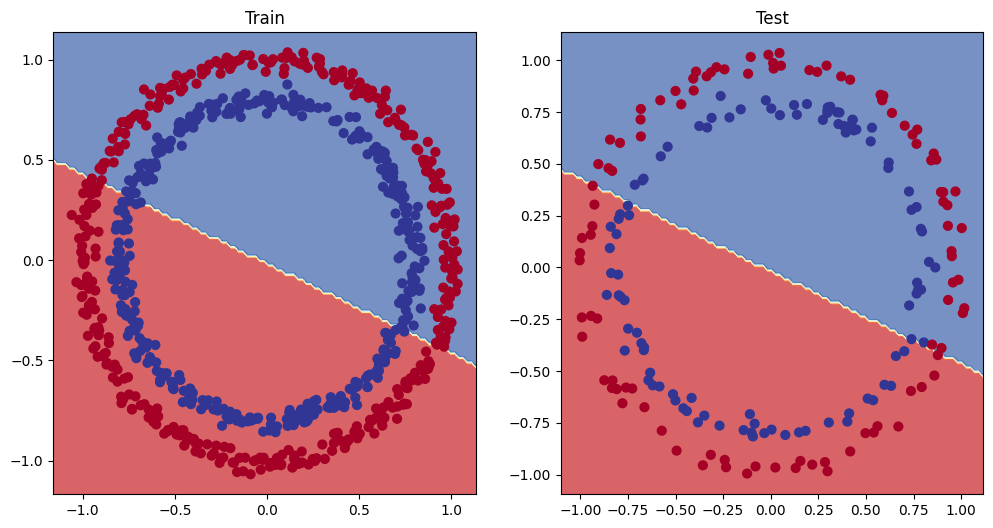

In [59]:
# Plotting the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

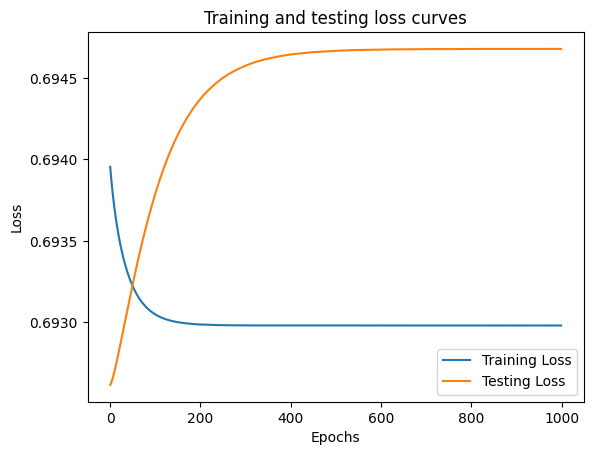

In [60]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

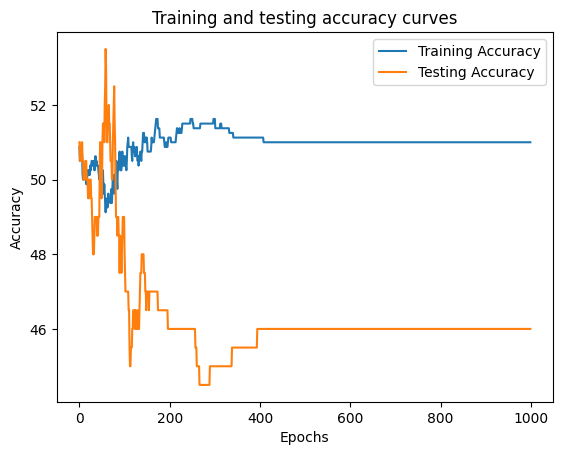

In [61]:
# Plotting the accuracy curves
plt.plot(epoch_count, train_acc_values, label="Training Accuracy")
plt.plot(epoch_count, test_acc_values, label="Testing Accuracy")
plt.title("Training and testing accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

### Checking if the model performs on straight line data

#### Preparing the data

In [69]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [70]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


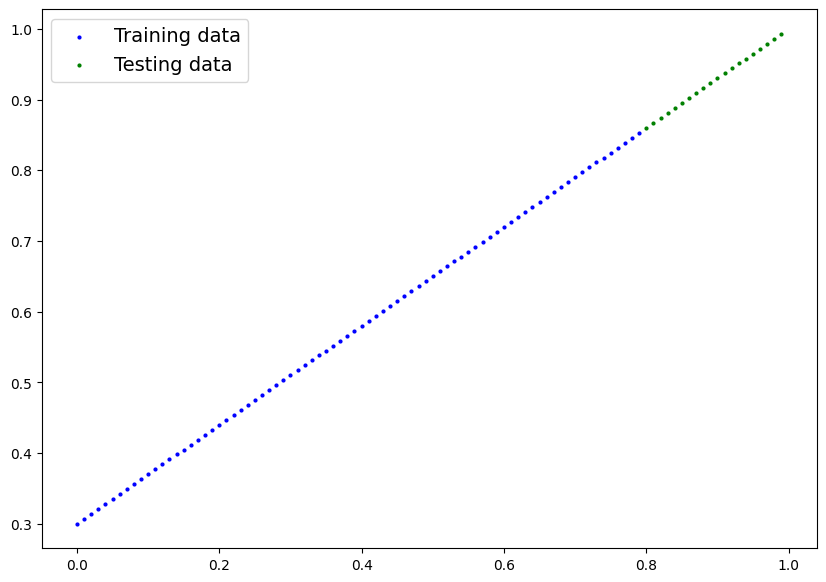

In [71]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

#### Making a model for the regression data (same model as model1)

In [73]:
model2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [75]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model2.parameters(),lr=0.1)

In [76]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    train_acc_values.append(acc)
    test_acc_values.append(test_acc)
    epoch_count.append(epoch)

Epoch: 0 | Train loss: 0.57896, Test loss: 0.47265
Epoch: 100 | Train loss: 0.05652, Test loss: 0.17491
Epoch: 200 | Train loss: 0.05272, Test loss: 0.15038
Epoch: 300 | Train loss: 0.05733, Test loss: 0.14733
Epoch: 400 | Train loss: 0.05780, Test loss: 0.14758
Epoch: 500 | Train loss: 0.04943, Test loss: 0.12419
Epoch: 600 | Train loss: 0.05284, Test loss: 0.14350
Epoch: 700 | Train loss: 0.07244, Test loss: 0.12574
Epoch: 800 | Train loss: 0.04493, Test loss: 0.11135
Epoch: 900 | Train loss: 0.05377, Test loss: 0.13252


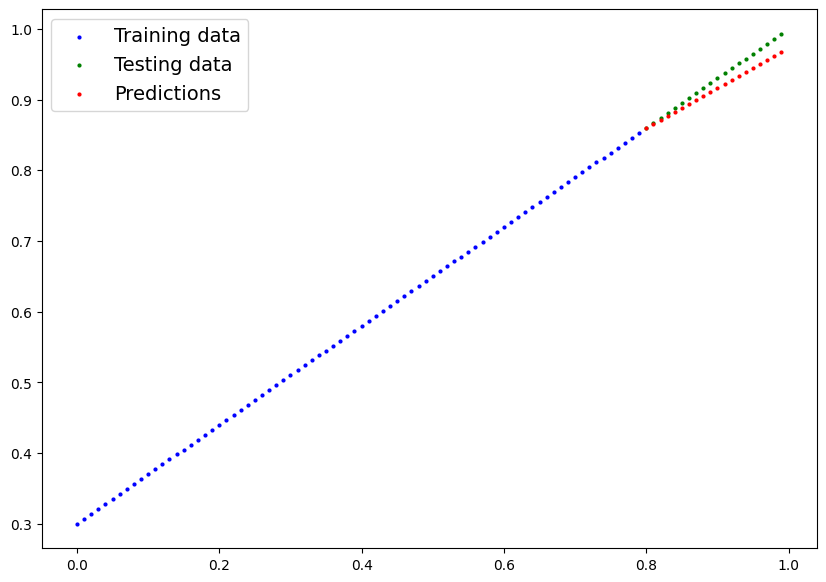

In [78]:
# Turn on evaluation mode
model2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

From this, we can say that the model performs well on linear data. This may be due to us using the Linear() functions.

To bring about non-linearity in the model, we'll have to use some other activation functions

### Non-Linearity

#### Recreating non-linear data

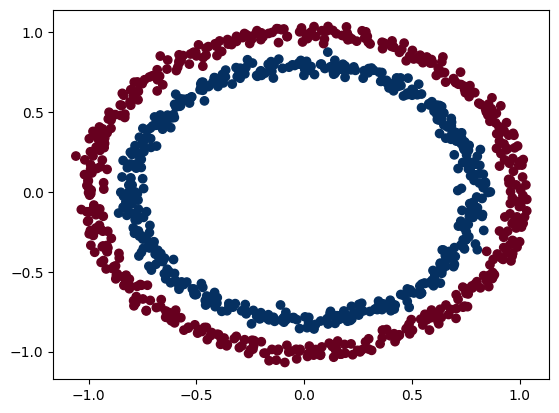

In [79]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [80]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### Building a model with non-linearity

In [98]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # z = self.layer1(x)
    # z = self.relu(z)
    # z = self.layer2(z)
    # z = self.relu(z)
    # z = self.layer3(z)
    # return z
    # (OR)
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model3 = CircleModelV2().to(device)
print(model3)


CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [99]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

# This time using the Adam optimizer
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

#### Training with non-linearity

In [100]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Making the loss and acc values list
train_loss_values=[]
test_loss_values=[]
train_acc_values=[]
test_acc_values=[]
epoch_count=[]

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    train_acc_values.append(acc)
    test_acc_values.append(test_acc)
    epoch_count.append(epoch)

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


#### Evaluating the model

In [101]:
# Make predictions
model3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

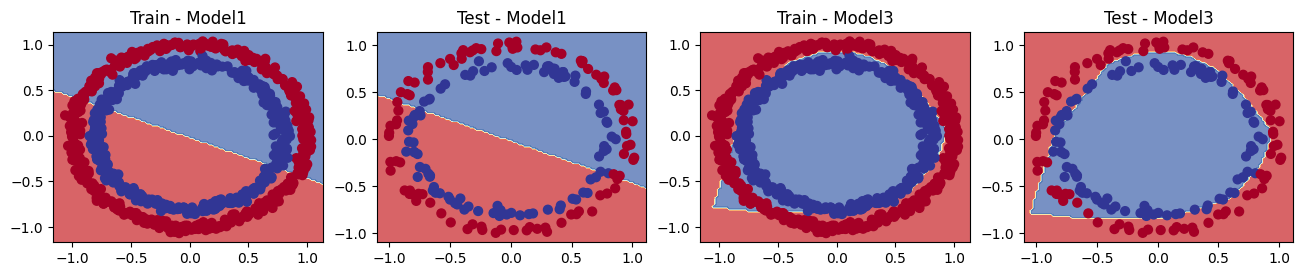

In [102]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(16, 6))
plt.subplot(2, 4, 1)
plt.title("Train - Model1")
plot_decision_boundary(model1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(2, 4, 2)
plt.title("Test - Model1")
plot_decision_boundary(model1, X_test, y_test)

plt.subplot(2, 4, 3)
plt.title("Train - Model3")
plot_decision_boundary(model3, X_train, y_train) # model_3 = has non-linearity
plt.subplot(2, 4, 4)
plt.title("Test - Model3")
plot_decision_boundary(model3, X_test, y_test)


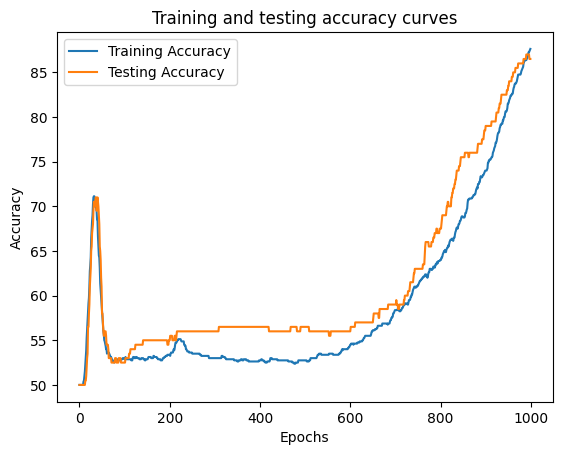

In [103]:
# Plotting the accuracy curves
plt.plot(epoch_count, train_acc_values, label="Training Accuracy")
plt.plot(epoch_count, test_acc_values, label="Testing Accuracy")
plt.title("Training and testing accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

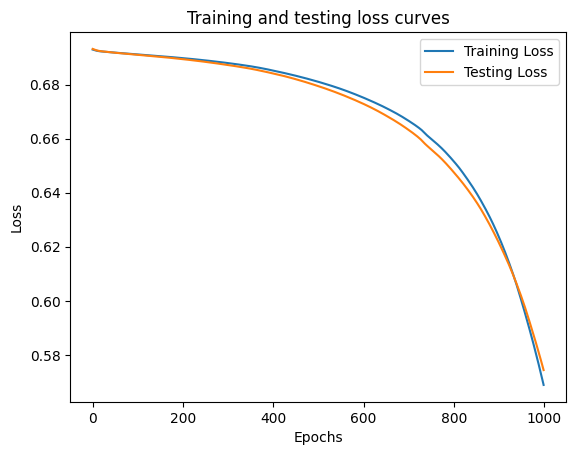

In [104]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

Now, from the above results we can say that the model has improved with the change in the activation functions

#### Trying the model with adam activation function

In [136]:
model4 = CircleModelV2().to(device)
print(model4)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [137]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

# This time using the Adam optimizer
optimizer = torch.optim.Adam(model4.parameters(), lr=0.01)

In [138]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Making the loss and acc values list
train_loss_values=[]
test_loss_values=[]
train_acc_values=[]
test_acc_values=[]
epoch_count=[]

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model4(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model4(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    train_acc_values.append(acc)
    test_acc_values.append(test_acc)
    epoch_count.append(epoch)

Epoch: 0 | Loss: 0.69395, Accuracy: 54.75% | Test Loss: 0.69104, Test Accuracy: 55.50%
Epoch: 100 | Loss: 0.09545, Accuracy: 99.88% | Test Loss: 0.13078, Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.01004, Accuracy: 100.00% | Test Loss: 0.02494, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00430, Accuracy: 100.00% | Test Loss: 0.01690, Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.00246, Accuracy: 100.00% | Test Loss: 0.01318, Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.00160, Accuracy: 100.00% | Test Loss: 0.01117, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.00113, Accuracy: 100.00% | Test Loss: 0.00950, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00085, Accuracy: 100.00% | Test Loss: 0.00834, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00066, Accuracy: 100.00% | Test Loss: 0.00752, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00052, Accuracy: 100.00% | Test Loss: 0.00753, Test Accuracy: 100.00%


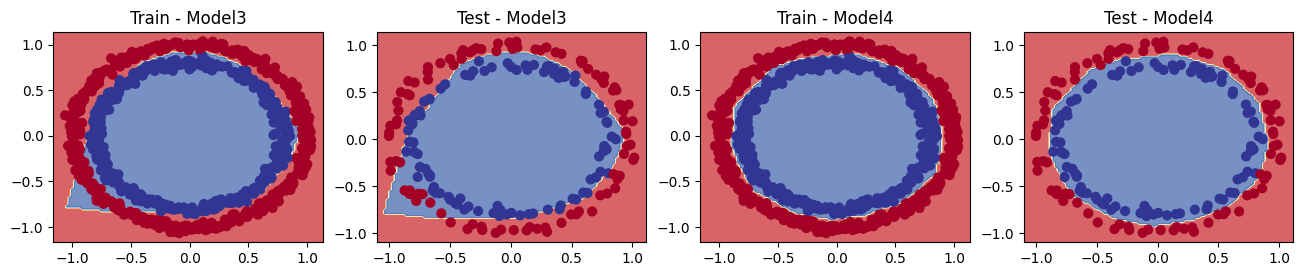

In [139]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(16, 6))
plt.subplot(2, 4, 1)
plt.title("Train - Model3")
plot_decision_boundary(model3, X_train, y_train) # model_3 = with SGD
plt.subplot(2, 4, 2)
plt.title("Test - Model3")
plot_decision_boundary(model3, X_test, y_test)

plt.subplot(2, 4, 3)
plt.title("Train - Model4")
plot_decision_boundary(model4, X_train, y_train) # model_4 = with Adam
plt.subplot(2, 4, 4)
plt.title("Test - Model4")
plot_decision_boundary(model4, X_test, y_test)


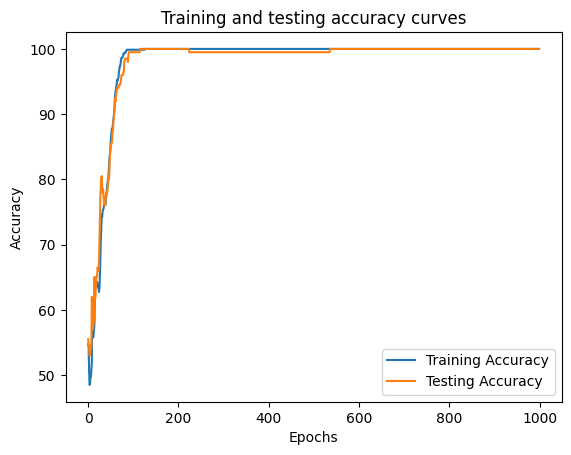

In [140]:
# Plotting the accuracy curves
plt.plot(epoch_count, train_acc_values, label="Training Accuracy")
plt.plot(epoch_count, test_acc_values, label="Testing Accuracy")
plt.title("Training and testing accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

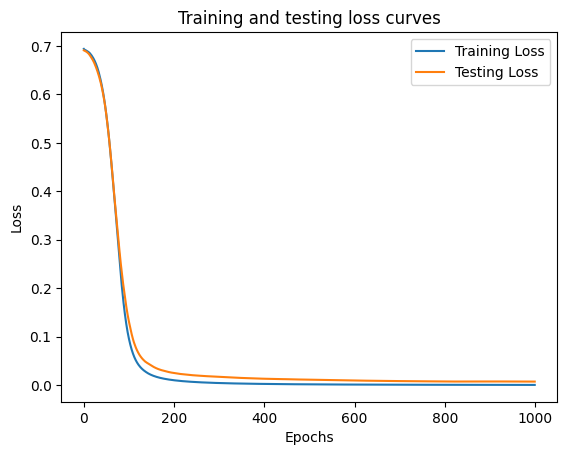

In [141]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### Making model for mutli-class PyTorch model

#### Creating data

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


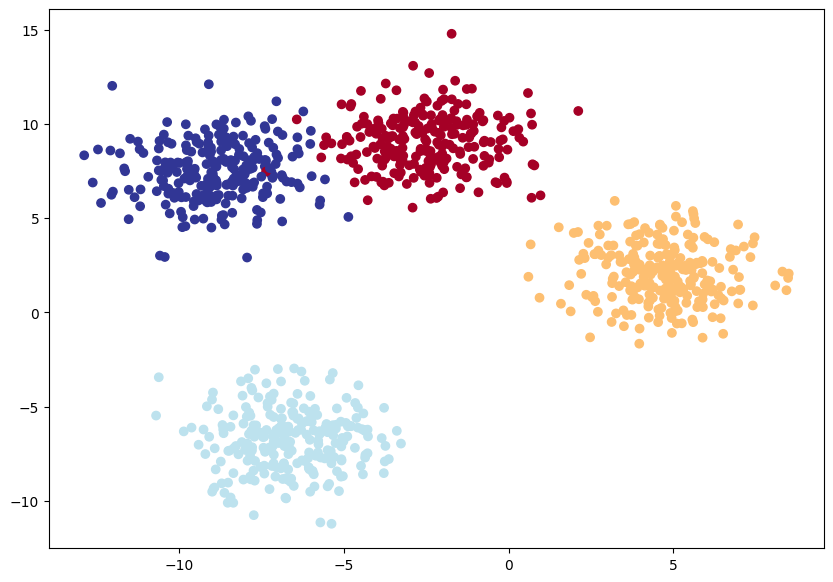

In [171]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

#### Building the model

In [172]:
# Setting up the device agnostic
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [183]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model5 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### Making loss and optimizer functions

In [184]:
# Creating the loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(),
                            lr=0.1)

#### Getting prediction probabilities

In [185]:
# Perform forward pass on data
model5(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

Here, we are getting one value per feature of each sample

In [186]:
# How many elements in a single prediction sample?
model5(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [187]:
# Make predictions logits with model
y_logits = model5(X_blob_test.to(device))

# Perform softmax activation on the logits
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [188]:
y_blob_train.shape

torch.Size([800])

Now, after softmax we can see that each sample adds up to one

In [189]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [190]:
# Which class does the model think of more likely
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


Here, we can see that pred prob at index 3 of the sample i.e. 0.3866 here, is the most likely outcome of the model

#### Creating a training and testing loop for the model

In [191]:
# Fit the model
torch.manual_seed(42)

# Making the loss and acc values list
train_loss_values=[]
test_loss_values=[]
train_acc_values=[]
test_acc_values=[]
epoch_count=[]

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model5.train()

    # 1. Forward pass
    y_logits = model5(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model5.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model5(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    train_acc_values.append(acc)
    test_acc_values.append(test_acc)
    epoch_count.append(epoch)

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


#### Making predictions and evaluating the model

In [192]:
model5.eval()
with torch.inference_mode():
  y_logits = model5(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [193]:
# Turn the logits into prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


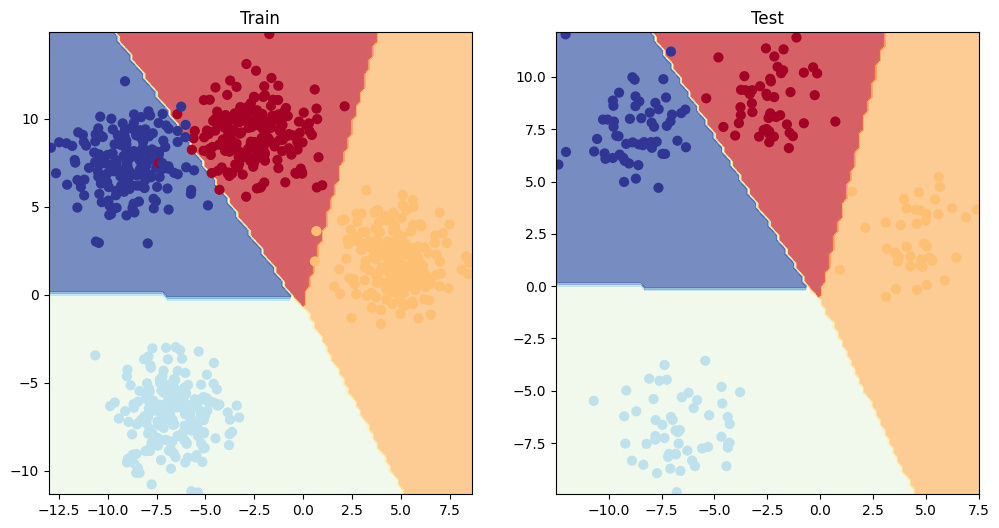

In [195]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model5, X_blob_test, y_blob_test)